TASK 3: CAR PRICE PREDICTION WITH MACHINE LEARNING

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Darshit\OneDrive\Desktop\OIBSIP\Task 3\car data.csv')

In [4]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 32*"-" + "Listing all the Numerical and Categorical columns in the dataframe".center(50) + 32*"-")
    numerical_features = df.select_dtypes(include='number').columns.tolist()
    print(f'\nNumerical columns in the dataframe: {numerical_features}')
    Categorical_features = df.select_dtypes(include='object').columns.tolist()
    print(f'\nCategorical columns in the dataframe: {Categorical_features}')
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2))
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').round(2))
    print("\n" + 40 * "-" + "Checking for null values in the dataset".center(55) + 40 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Checking for duplicate values in the dataset".center(55) + 40 * "-")
    print(f'\nTotal number of duplicated rows in the dataset are {df.duplicated().sum()}\n')    
    print("-"*135)    

data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 2709

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 301 rows and 9 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual     

In [5]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
def text_upper(text):
    text = text.str.upper()
    return text

cat = df.select_dtypes(include='O')
for c in cat:
    df[c] = text_upper(df[c])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0


In [8]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,CITY,PETROL,DEALER,MANUAL
freq,26,239,193,260


In [9]:
print(f"Unique Values for categorical columns:\n")
for col in df.select_dtypes(include='object'):
    print(f"  - {col}: {df[col].unique()}\n")
    print("-"*135)

Unique Values for categorical columns:

  - Car_Name: ['RITZ' 'SX4' 'CIAZ' 'WAGON R' 'SWIFT' 'VITARA BREZZA' 'S CROSS'
 'ALTO 800' 'ERTIGA' 'DZIRE' 'ALTO K10' 'IGNIS' '800' 'BALENO' 'OMNI'
 'FORTUNER' 'INNOVA' 'COROLLA ALTIS' 'ETIOS CROSS' 'ETIOS G' 'ETIOS LIVA'
 'COROLLA' 'ETIOS GD' 'CAMRY' 'LAND CRUISER' 'ROYAL ENFIELD THUNDER 500'
 'UM RENEGADE MOJAVE' 'KTM RC200' 'BAJAJ DOMINAR 400'
 'ROYAL ENFIELD CLASSIC 350' 'KTM RC390' 'HYOSUNG GT250R'
 'ROYAL ENFIELD THUNDER 350' 'KTM 390 DUKE ' 'MAHINDRA MOJO XT300'
 'BAJAJ PULSAR RS200' 'ROYAL ENFIELD BULLET 350'
 'ROYAL ENFIELD CLASSIC 500' 'BAJAJ AVENGER 220' 'BAJAJ AVENGER 150'
 'HONDA CB HORNET 160R' 'YAMAHA FZ S V 2.0' 'YAMAHA FZ 16'
 'TVS APACHE RTR 160' 'BAJAJ PULSAR 150' 'HONDA CBR 150' 'HERO EXTREME'
 'BAJAJ AVENGER 220 DTSI' 'BAJAJ AVENGER 150 STREET' 'YAMAHA FZ  V 2.0'
 'BAJAJ PULSAR  NS 200' 'BAJAJ PULSAR 220 F' 'TVS APACHE RTR 180'
 'HERO PASSION X PRO' 'BAJAJ PULSAR NS 200' 'YAMAHA FAZER '
 'HONDA ACTIVA 4G' 'TVS SPORT ' 'HONDA

In [10]:
for col in df:
    if df[col].dtype == "object":
        print('Column Name:', df[col].value_counts())
        print('-'*135)

Column Name: Car_Name
CITY                  26
COROLLA ALTIS         16
VERNA                 14
BRIO                  10
FORTUNER              10
                      ..
HONDA ACTIVA 125       1
HERO HUNK              1
HERO  IGNITOR DISC     1
HERO  CBZ XTREME       1
BAJAJ  CT 100          1
Name: count, Length: 98, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Fuel_Type
PETROL    239
DIESEL     58
CNG         2
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Selling_type
DEALER        193
INDIVIDUAL    106
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Transmission
MANUAL       260
AUTOMATIC     39
Name: count, dtype

In [11]:
for col in df:
    if df[col].dtype == "object":
        print('Column Name:',((df[col].value_counts()/df[col].shape[0])*100).round(2))
        print('-'*135)

Column Name: Car_Name
CITY                  8.70
COROLLA ALTIS         5.35
VERNA                 4.68
BRIO                  3.34
FORTUNER              3.34
                      ... 
HONDA ACTIVA 125      0.33
HERO HUNK             0.33
HERO  IGNITOR DISC    0.33
HERO  CBZ XTREME      0.33
BAJAJ  CT 100         0.33
Name: count, Length: 98, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Fuel_Type
PETROL    79.93
DIESEL    19.40
CNG        0.67
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Selling_type
DEALER        64.55
INDIVIDUAL    35.45
Name: count, dtype: float64
---------------------------------------------------------------------------------------------------------------------------------------
Column Name: Transmission
MANUAL       8

In [12]:
num_col = ['Owner','Year']
for i in num_col:
    print(f'Unique Values of {i}:', sorted(df[i].unique()))

Unique Values of Owner: [np.int64(0), np.int64(1), np.int64(3)]
Unique Values of Year: [np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]


In [13]:
df['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

In [14]:
print("Maximum distance driven:",max(df["Driven_kms"]))
print("Minimum distance driven:",min(df["Driven_kms"]))

Maximum distance driven: 500000
Minimum distance driven: 500


In [15]:
print("Maximum Selling_Price:",max(df["Selling_Price"]))
print("Minimum Selling_Price:",min(df["Selling_Price"]))

Maximum Selling_Price: 35.0
Minimum Selling_Price: 0.1


In [16]:
print("Maximum Present_Price:",max(df["Present_Price"]))
print("Minimum Present_Price:",min(df["Present_Price"]))

Maximum Present_Price: 92.6
Minimum Present_Price: 0.32


In [17]:
todays_date = date.today() 
df['Car_age'] = todays_date.year - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,11
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,12
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,8
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,14
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,11


Text(0, 0.5, 'Density')

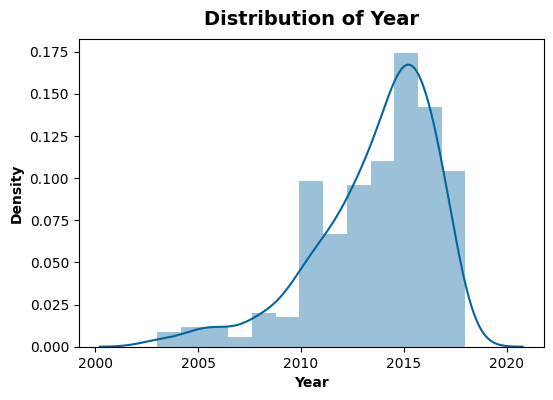

In [18]:
plt.figure(figsize = (6,4))
sns.distplot(df.Year, color="#04649d")
plt.title(f'Distribution of Year',fontsize=14,pad=10, fontweight='bold')
plt.xlabel('Year', fontsize=10, fontweight="bold")
plt.ylabel('Density', fontsize=10, fontweight="bold")

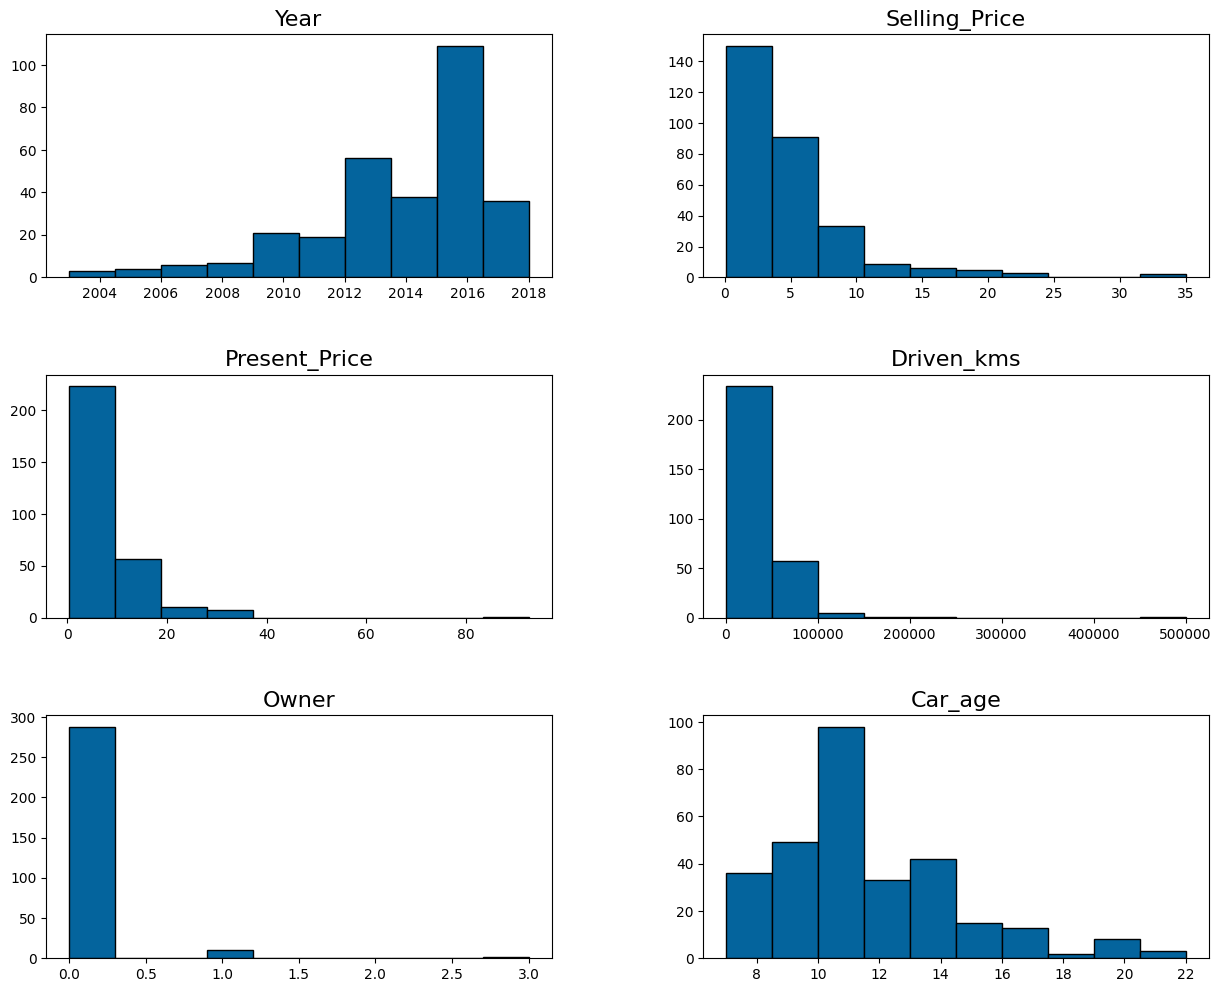

In [19]:
fig = df.hist(figsize=(15,12), color="#04649d",ec="k", grid=False)
[x.title.set_size(16) for x in fig.ravel()]
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

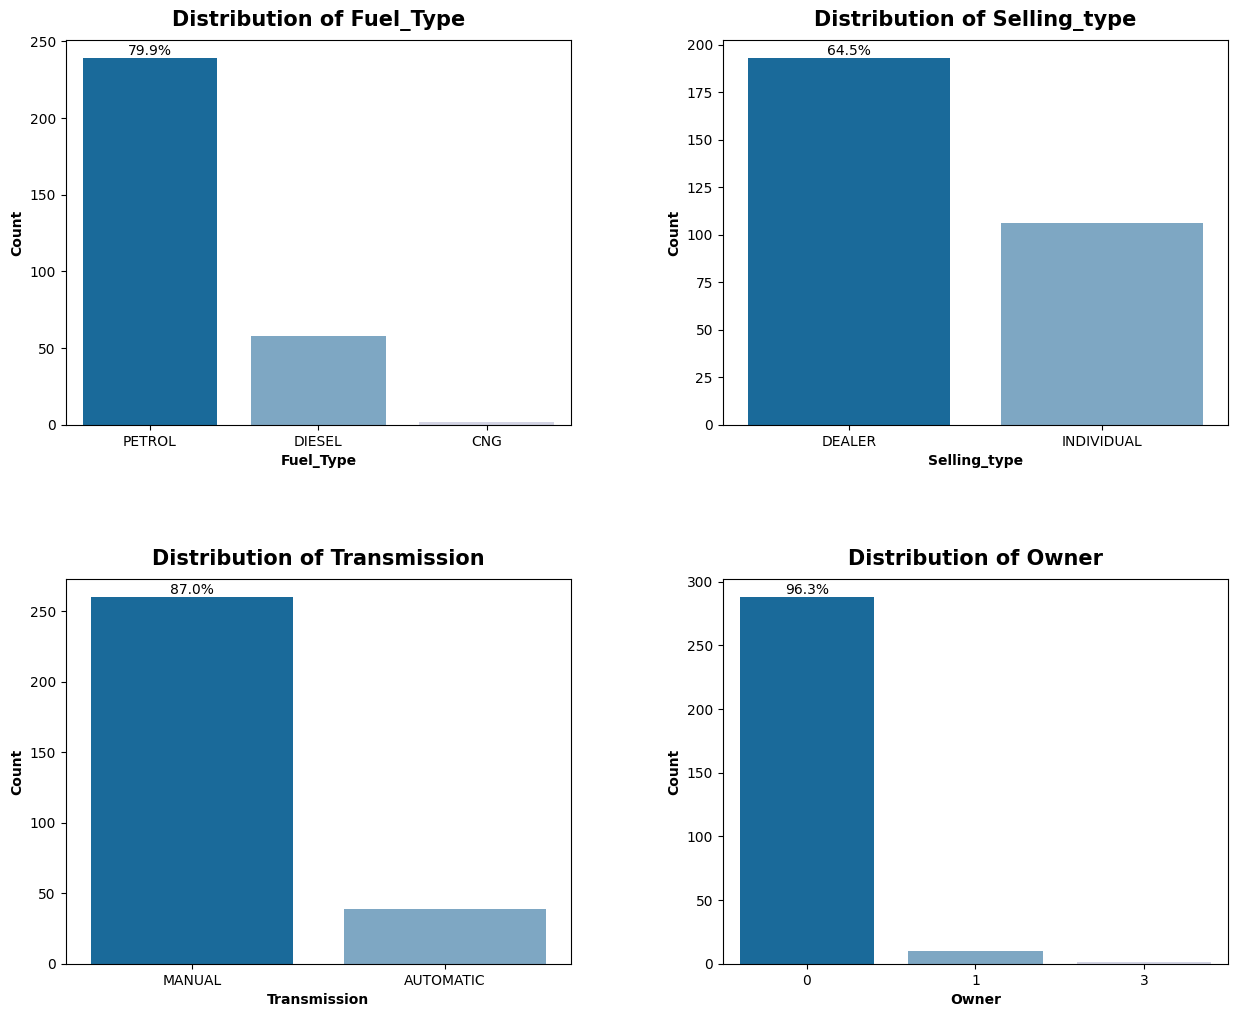

In [20]:
plt.figure(figsize = (15,12))

for i,z in enumerate(['Fuel_Type','Selling_type', 'Transmission','Owner']):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(data=df, x=z,palette = sns.color_palette("PuBu",3)[::-1])
    plt.title(f'Distribution of {z}',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
    total = len(df[z])

    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')    
   
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

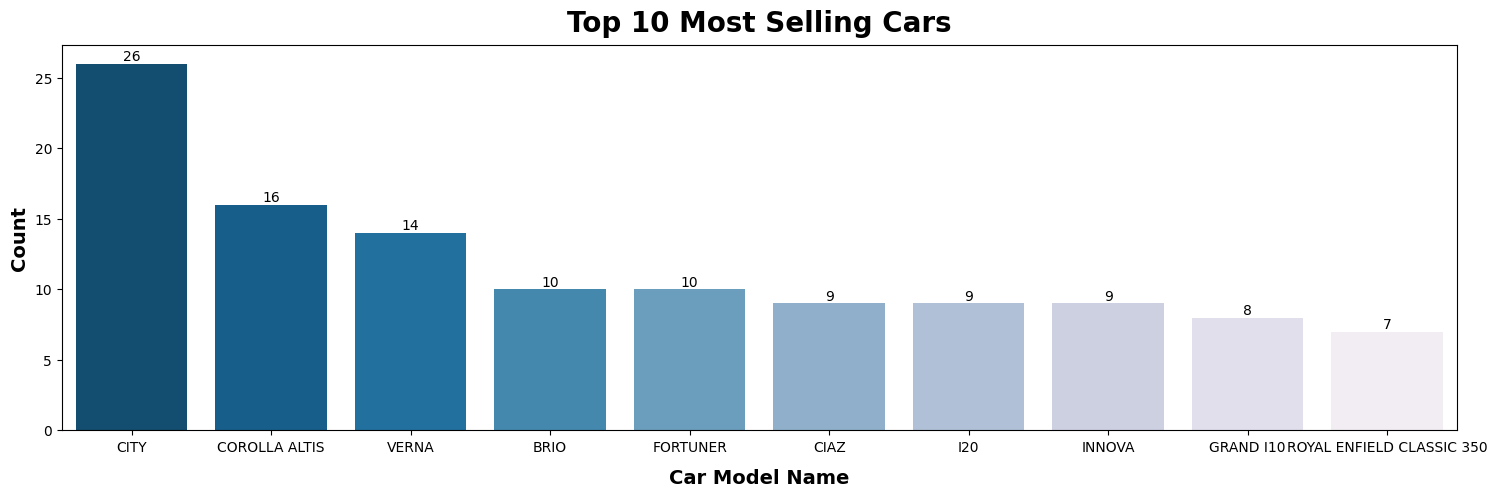

In [21]:
top10 = df['Car_Name'].value_counts()[:10]

plt.figure(figsize=(18,5))
plot= sns.countplot(x='Car_Name', data=df, order=top10.index, palette=sns.color_palette("PuBu",10)[::-1])

for container in plot.containers:
    plot.bar_label(container)
        
plt.xlabel('Car Model Name',fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel('Count',fontsize=14, fontweight="bold")
plt.title('Top 10 Most Selling Cars', fontsize=20, pad=10, fontweight='bold')

plt.show()

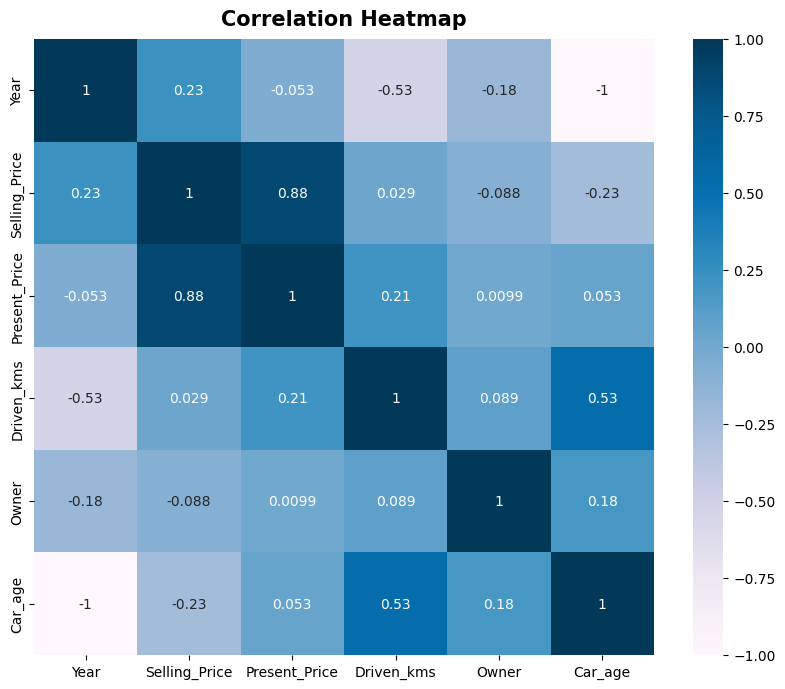

In [22]:
numerical_features = df.select_dtypes(include='number').columns.tolist()

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu')
plt.title('Correlation Heatmap',fontsize=15,pad=10, fontweight='bold')
plt.show()

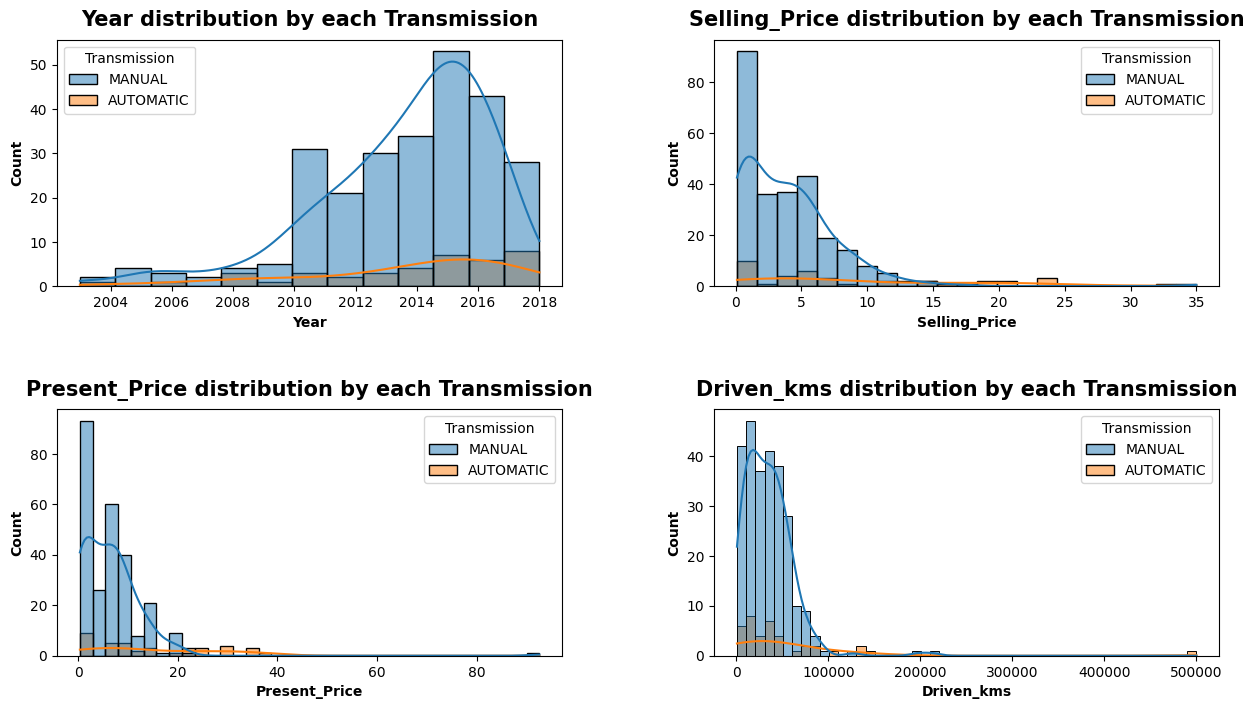

In [23]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Year','Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Transmission')
    plt.title(f'{z} distribution by each Transmission',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

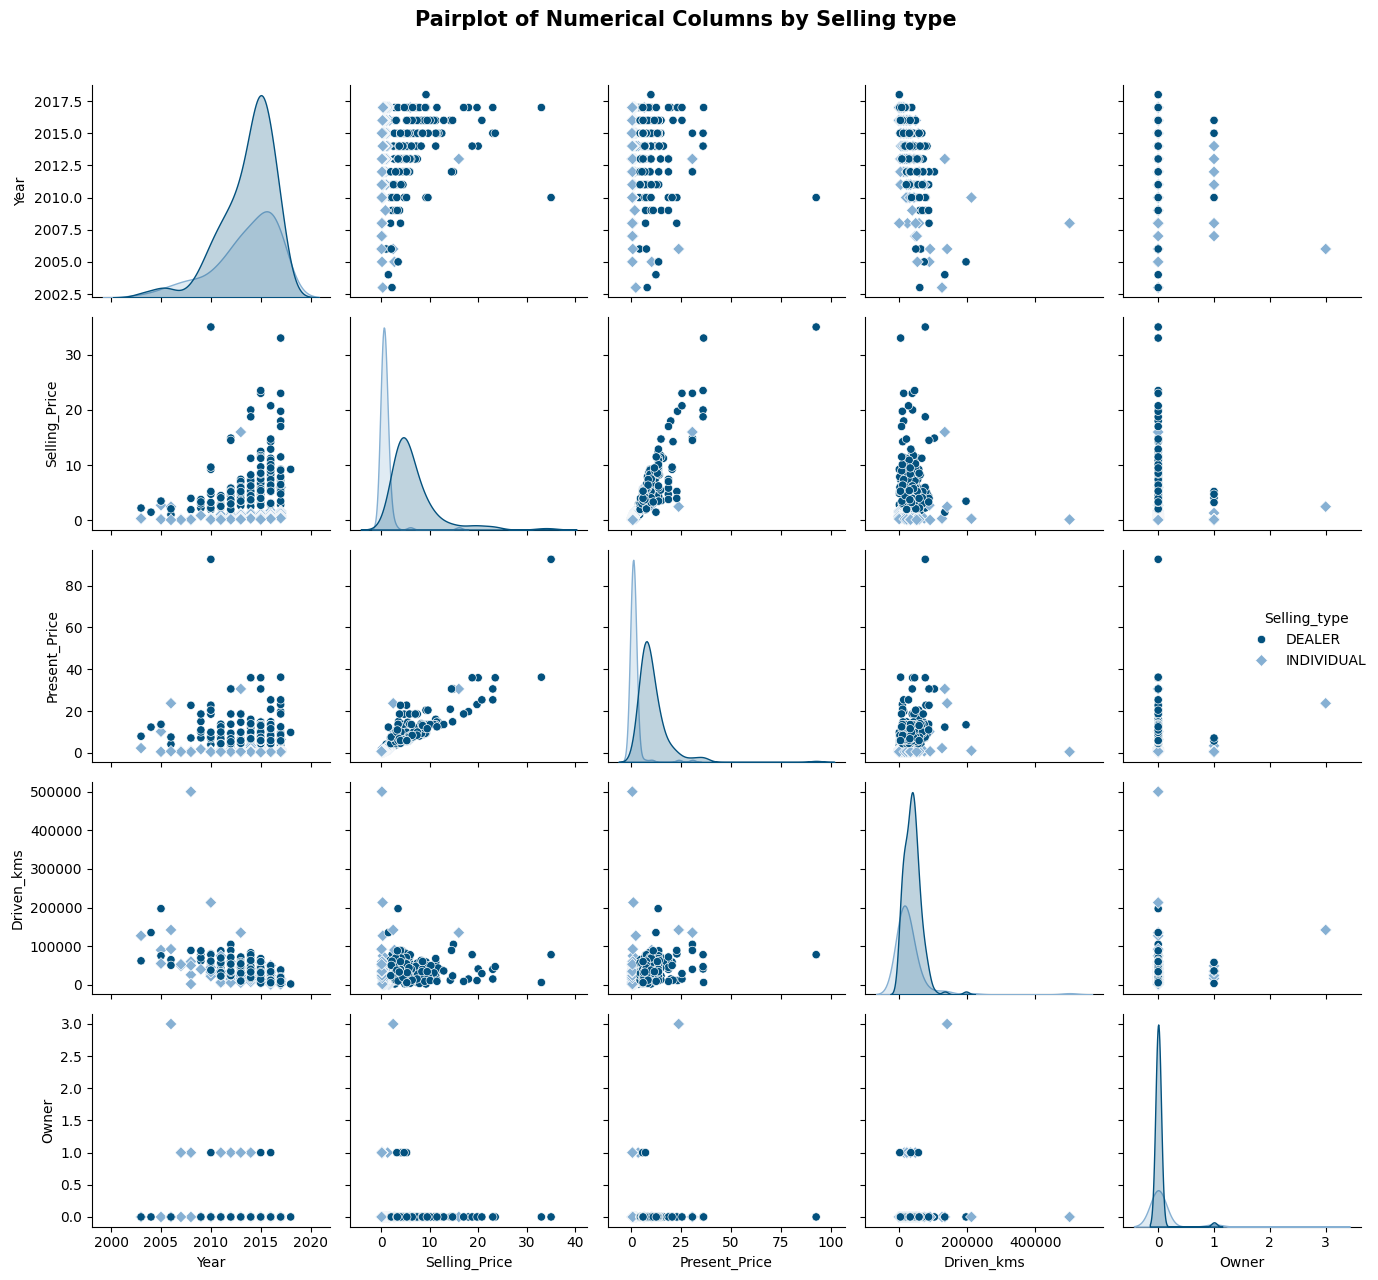

In [24]:
sns.pairplot(data=df, vars=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], 
             hue='Selling_type', markers=['o', 'D'], palette=["#03517e","#86b0d3"])
plt.suptitle('Pairplot of Numerical Columns by Selling type', y=1.02, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

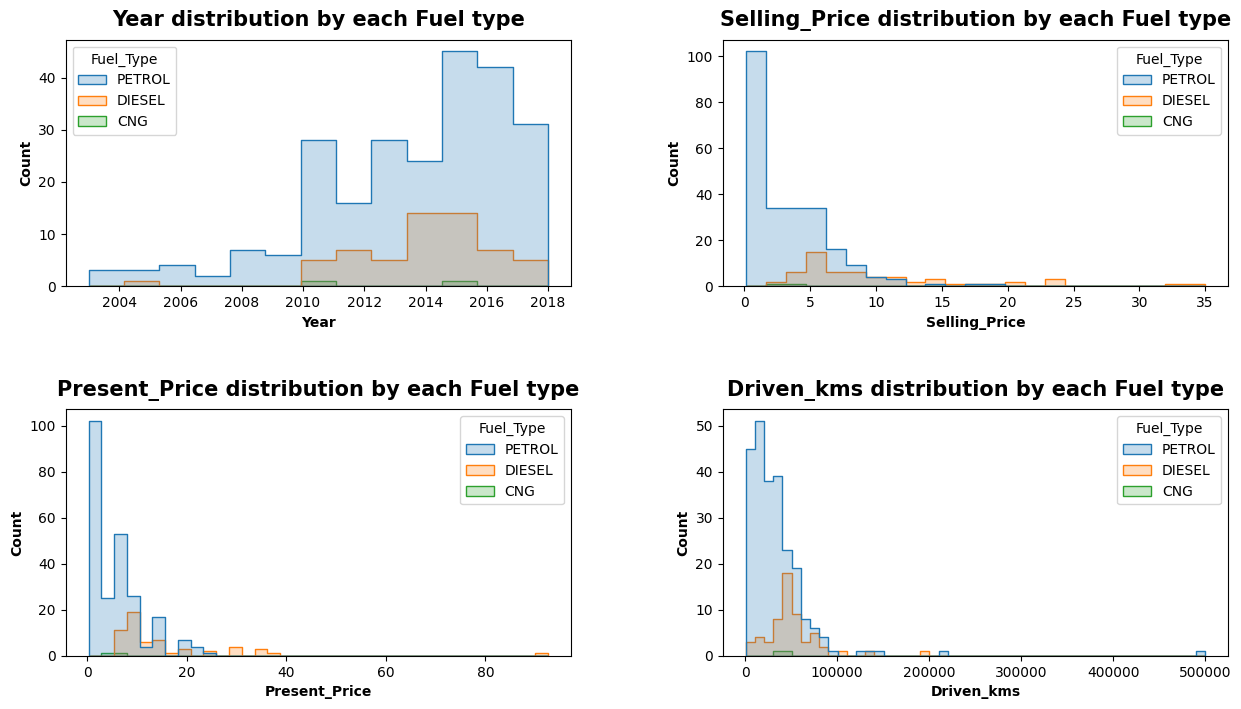

In [25]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['Year','Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=z, hue='Fuel_Type', element="step", common_norm=False)
    plt.title(f'{z} distribution by each Fuel type',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Count', fontsize=10, fontweight="bold")
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [26]:
def plot_bar(x,y,title):
    data = df.groupby([x])[y].mean().sort_values(ascending=False).head(20).to_frame()
    plt.figure(figsize=(18,5))
    plot = sns.barplot(x=data.index, y=data[y], palette=sns.color_palette("PuBu",20)[::-1])
    plt.title(title, fontsize=20,pad=10, fontweight='bold')
    for i, v in enumerate(data[y].values):
        plot.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold", labelpad=10)
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

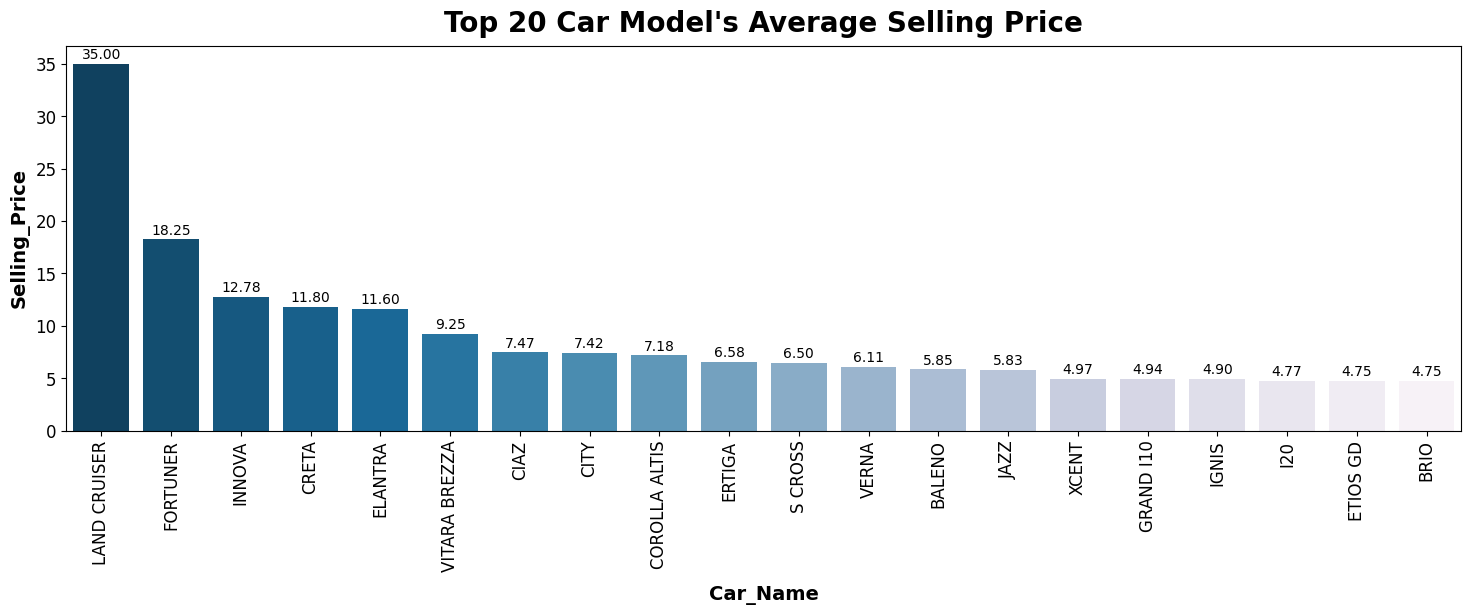

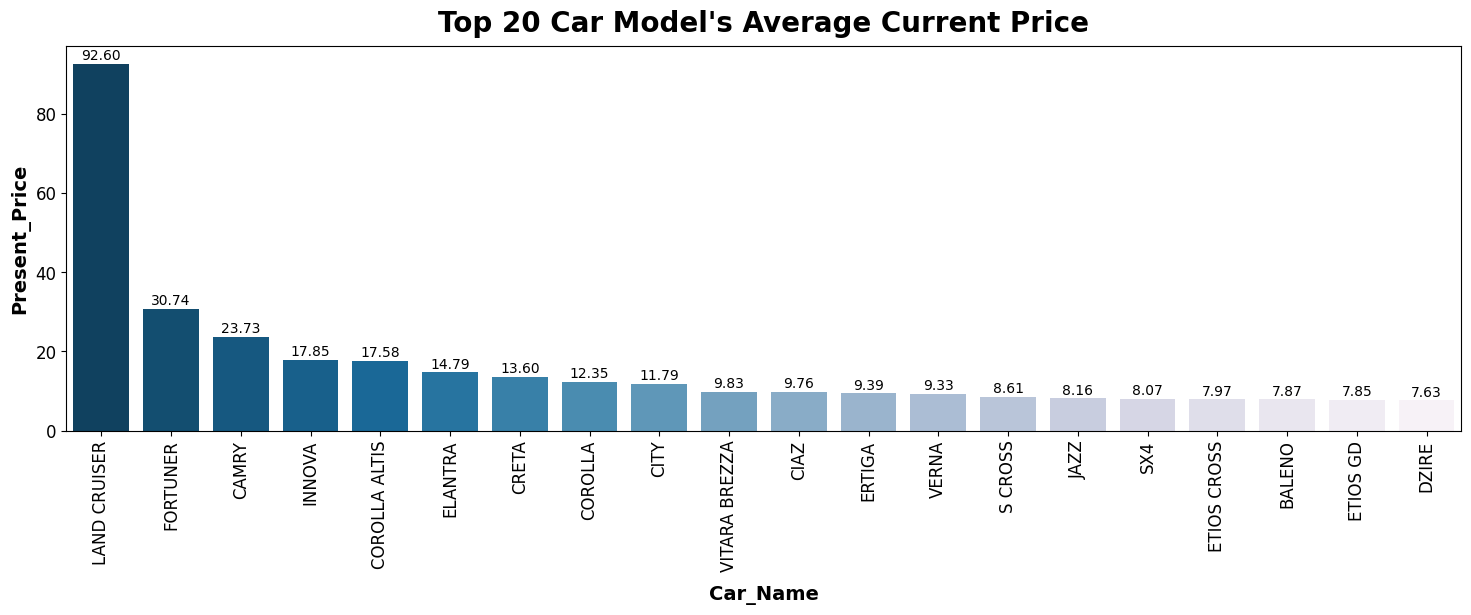

In [27]:
plot_bar('Car_Name','Selling_Price',"Top 20 Car Model's Average Selling Price")
print()
plot_bar('Car_Name','Present_Price',"Top 20 Car Model's Average Current Price")

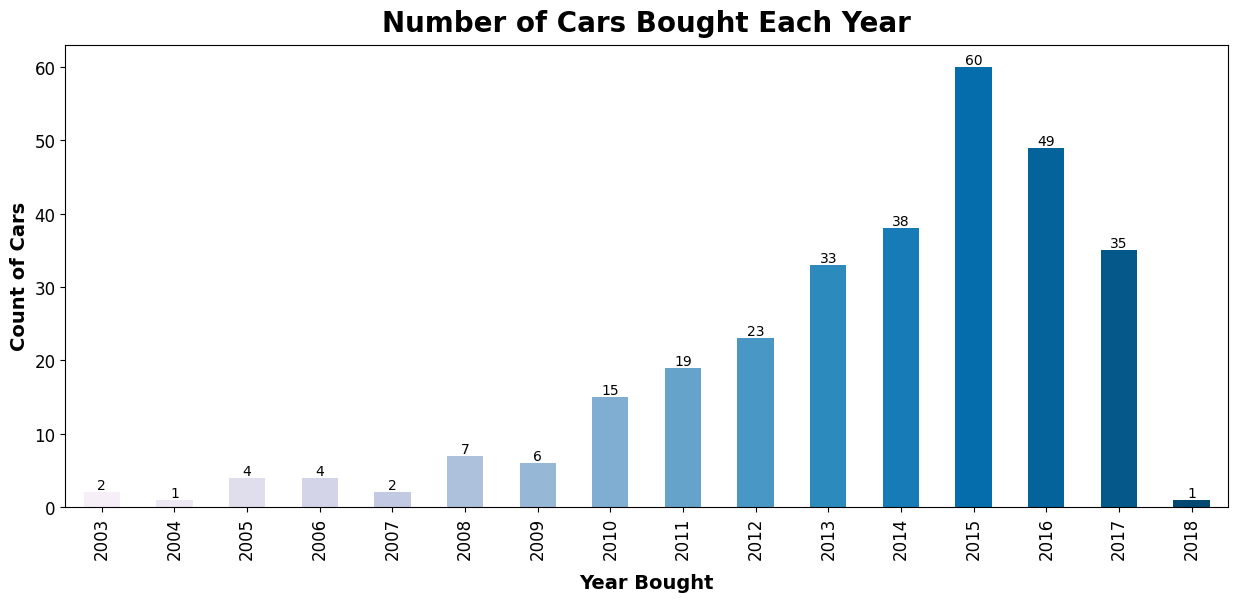

In [28]:
plt.figure(figsize=(15, 6))

yearly_counts = df.groupby('Year').count()['Car_Name']

plot = yearly_counts.plot(kind='bar',color=sns.color_palette("PuBu",16))

for container in plot.containers:
    plot.bar_label(container)

plt.tick_params(axis='x',rotation=90,labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.xlabel('Year Bought', fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel('Count of Cars', fontsize=14, fontweight="bold")
plt.title('Number of Cars Bought Each Year', fontsize=20,pad=10, fontweight='bold')

plt.show()

In [29]:
def plot_count(x,hue,title):
    plt.figure(figsize=(18,4))
    plot = sns.countplot(x=df[x], hue=df[hue], palette=["#03517e","#86b0d3","#e0dded"], order=df[x].value_counts().iloc[:15].index)
    for container in plot.containers:
        plot.bar_label(container)
    plt.title(f'{title} {hue}', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold")
    plt.ylabel('Count', fontsize=14, fontweight="bold")
    
    return plt.show()

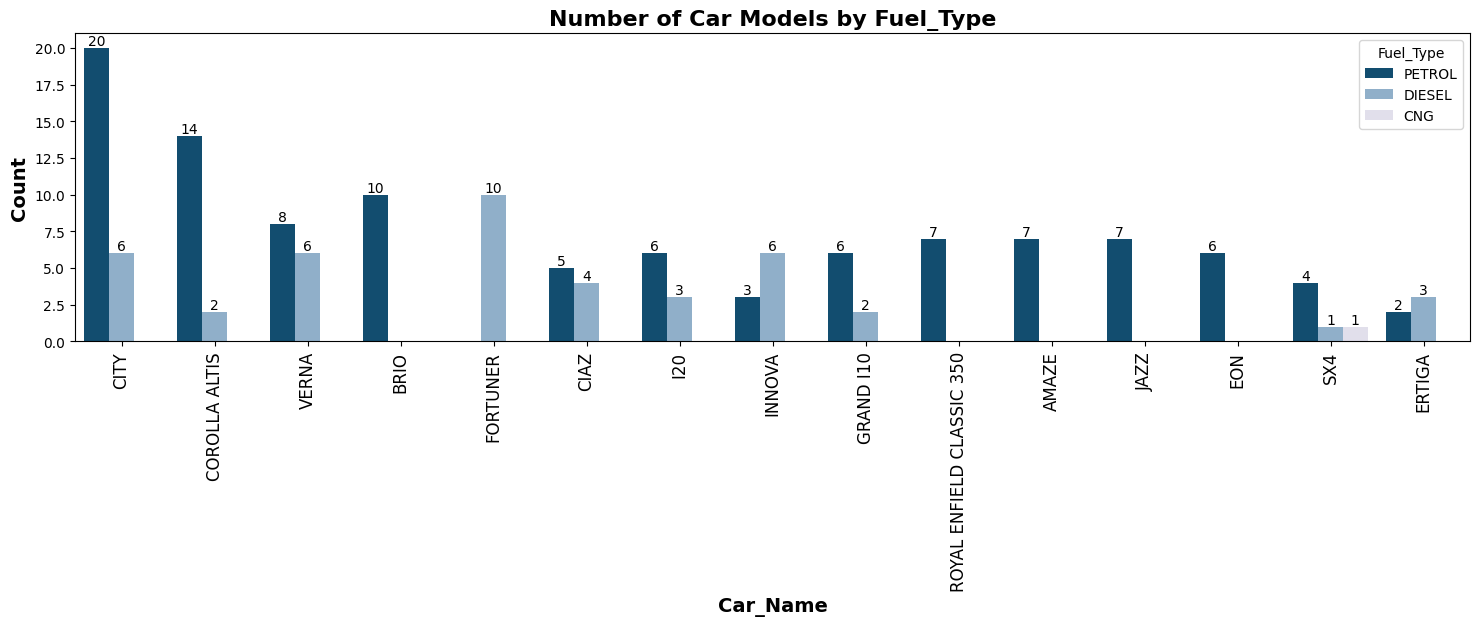

---------------------------------------------------------------------------------------------------------------------------------------


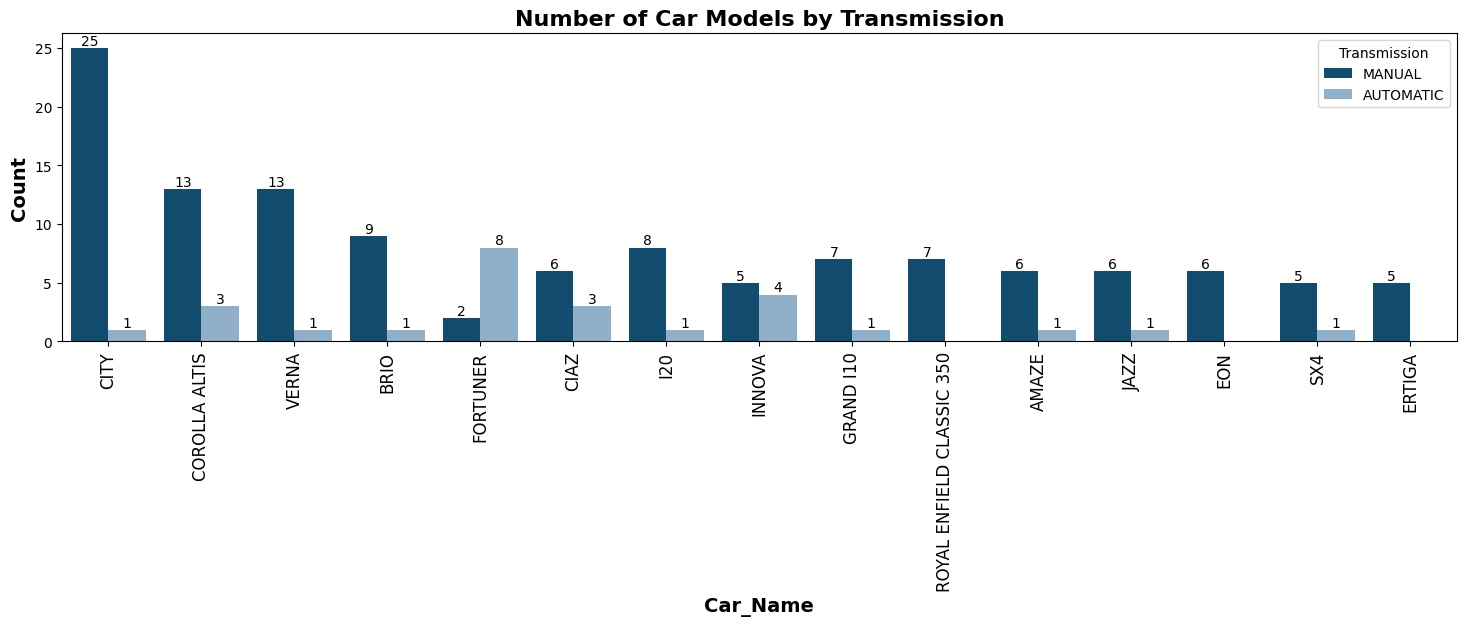

---------------------------------------------------------------------------------------------------------------------------------------


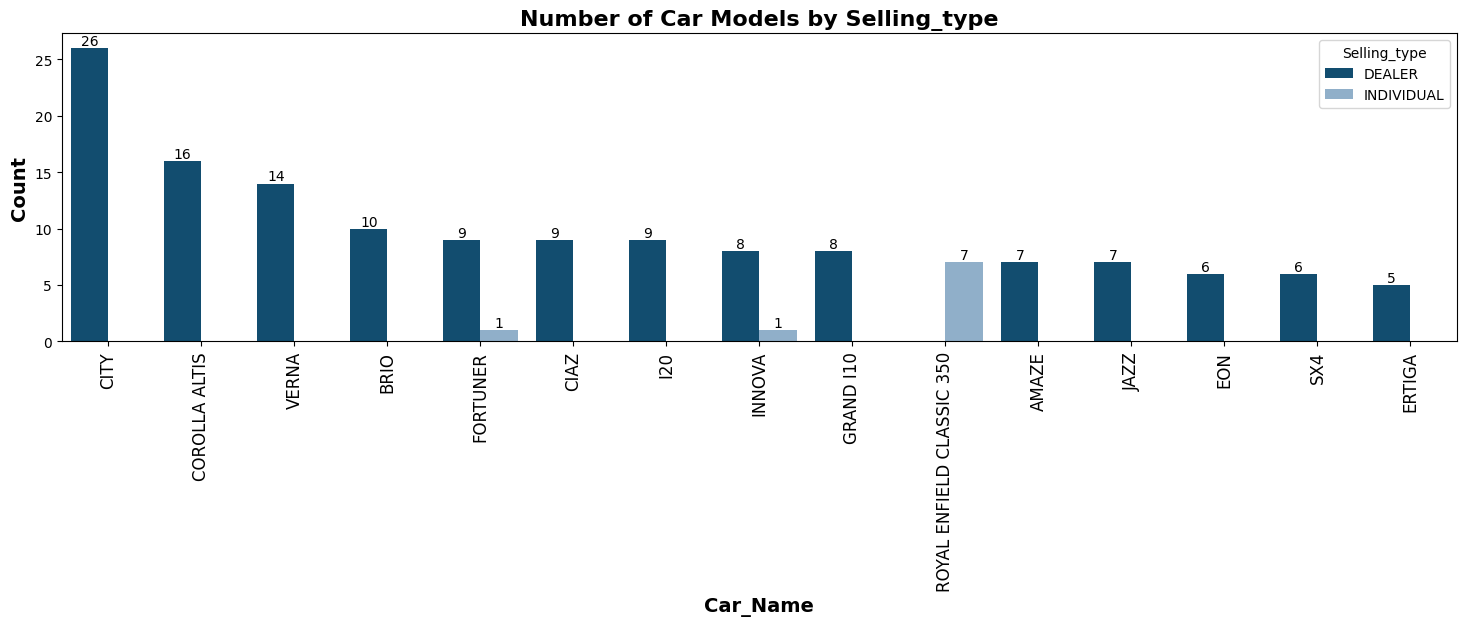

---------------------------------------------------------------------------------------------------------------------------------------


In [30]:
plot_count('Car_Name','Fuel_Type','Number of Car Models by')
print("-"*135)
plot_count('Car_Name','Transmission','Number of Car Models by')
print("-"*135)
plot_count('Car_Name','Selling_type','Number of Car Models by')
print("-"*135)

In [31]:
def plot_year_wise(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df[x], y=df[y], color="#04649d")
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold", labelpad=20)
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

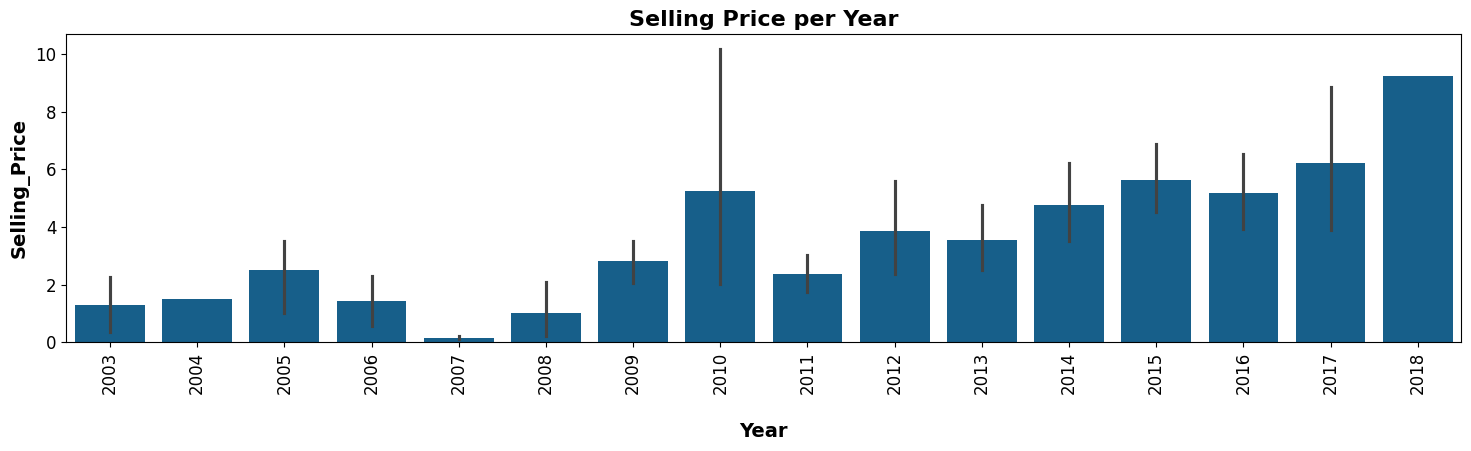

---------------------------------------------------------------------------------------------------------------------------------------


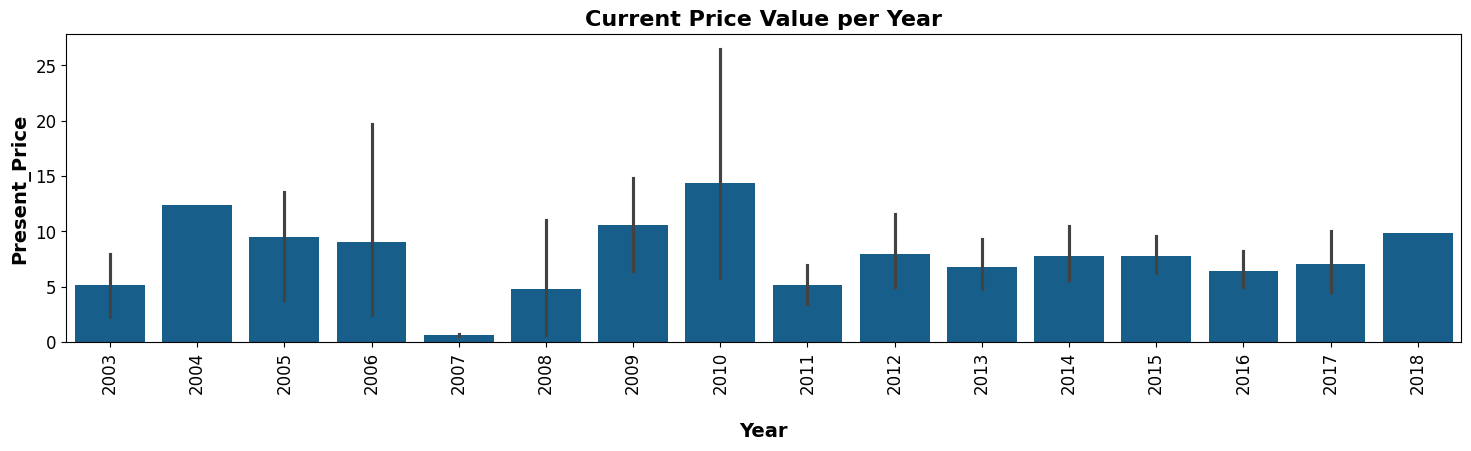

---------------------------------------------------------------------------------------------------------------------------------------


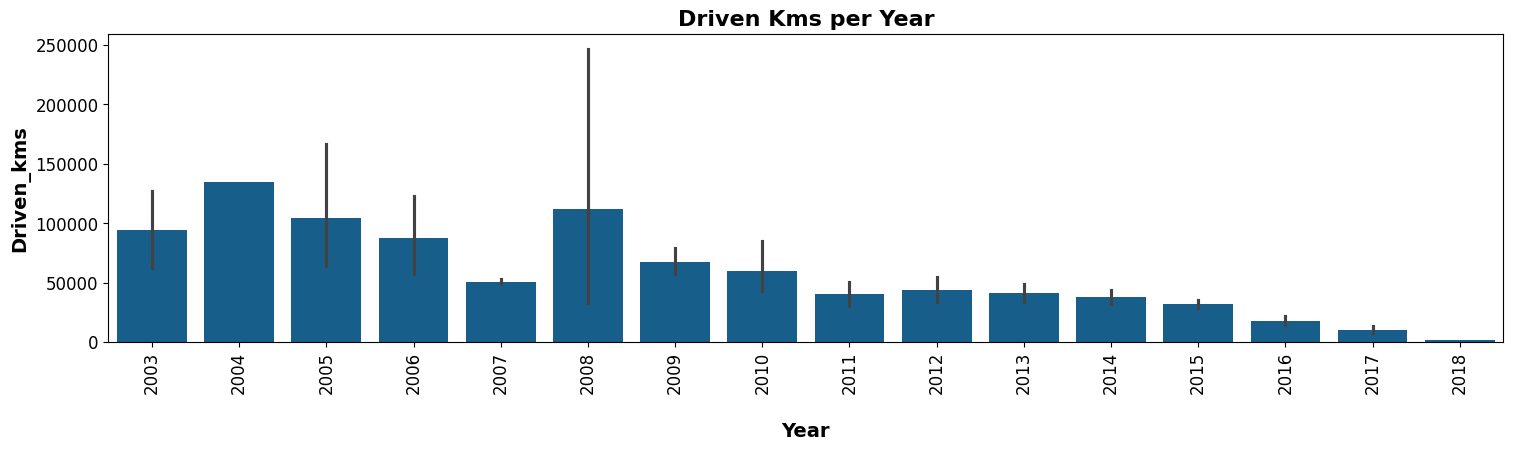

In [32]:
plot_year_wise('Year','Selling_Price','Selling Price per Year')
print("-"*135)
plot_year_wise('Year','Present_Price','Current Price Value per Year')
print("-"*135)
plot_year_wise('Year','Driven_kms','Driven Kms per Year')

In [33]:
def plot_scatter(x,y,title):
    plt.figure(figsize=(18,4))
    sns.regplot(x=df[x], y=df[y], color='#04649d')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14, fontweight="bold")
    plt.ylabel(y, fontsize=14, fontweight="bold")
    return plt.show()

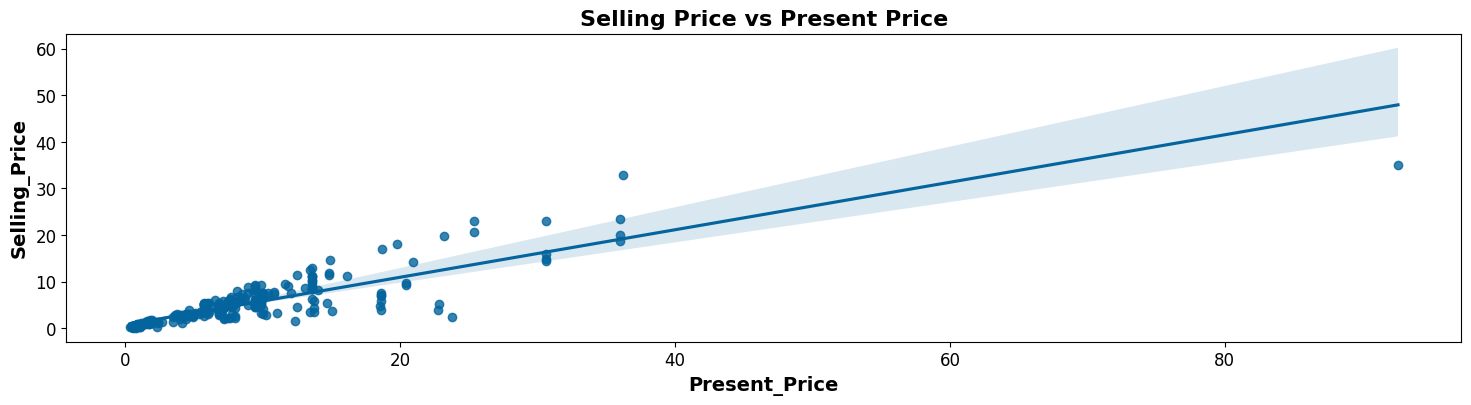

---------------------------------------------------------------------------------------------------------------------------------------


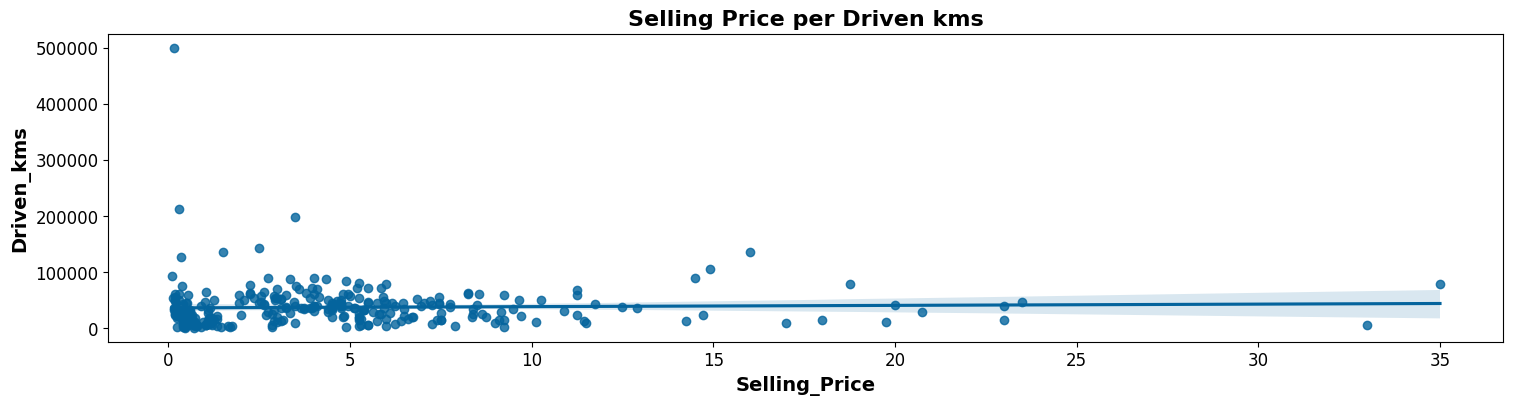

---------------------------------------------------------------------------------------------------------------------------------------


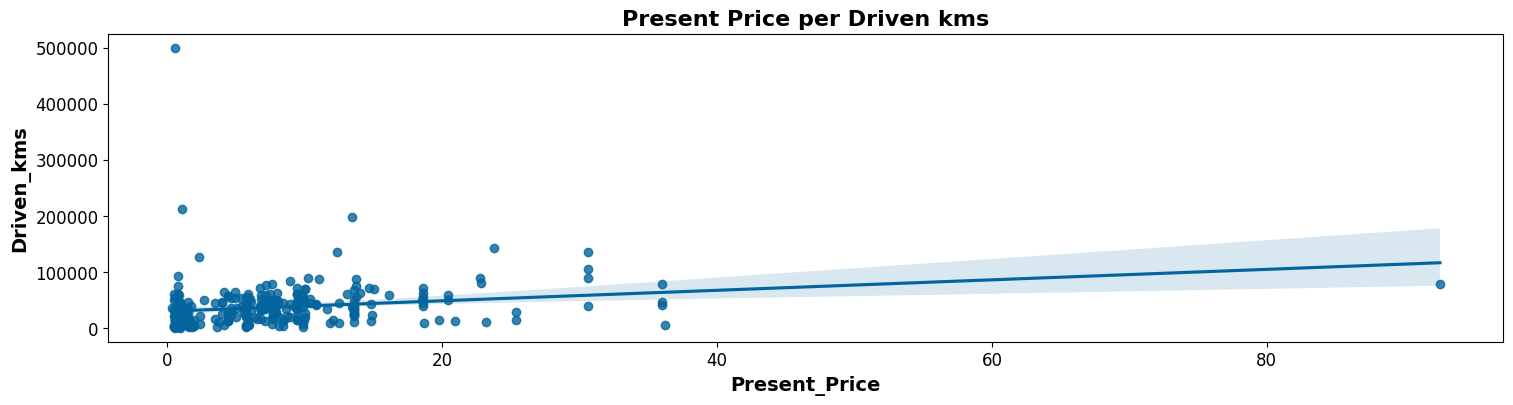

In [34]:
plot_scatter('Present_Price','Selling_Price','Selling Price vs Present Price')
print("-"*135)
plot_scatter('Selling_Price','Driven_kms','Selling Price per Driven kms')
print("-"*135)
plot_scatter('Present_Price', 'Driven_kms','Present Price per Driven kms')

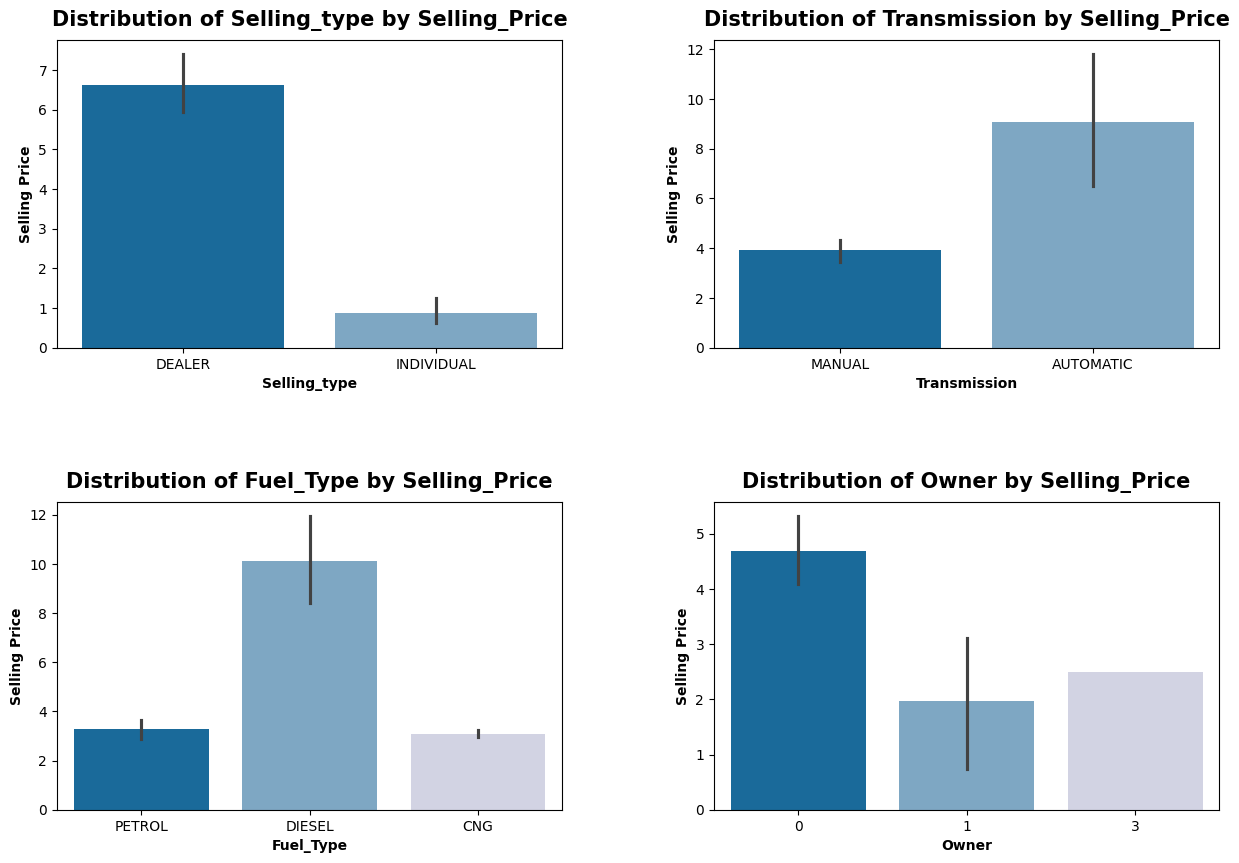

In [35]:
plt.figure(figsize = (15,10))

for i,z in enumerate(['Selling_type','Transmission', 'Fuel_Type','Owner']):
    plt.subplot(2,2,i+1)
    sns.barplot(data=df,x=z,y='Selling_Price', palette = sns.color_palette("PuBu",3)[::-1])
    plt.title(f'Distribution of {z} by Selling_Price',fontsize=15,pad=10, fontweight='bold')
    plt.xlabel(z, fontsize=10, fontweight="bold")
    plt.ylabel('Selling Price', fontsize=10, fontweight="bold")
    
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Text(0, 0.5, 'Selling Price')

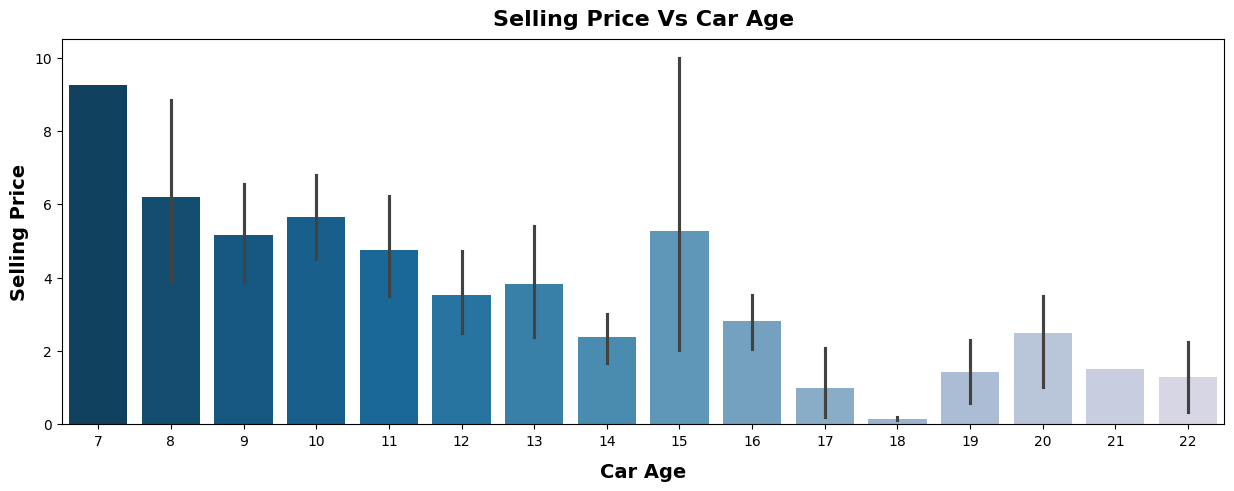

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Car_age',y='Selling_Price', palette=sns.color_palette("PuBu",20)[::-1])
plt.title('Selling Price Vs Car Age', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Car Age', fontsize=14, fontweight="bold",labelpad=10)
plt.ylabel('Selling Price', fontsize=14, fontweight="bold")

In [37]:
def remove_outliers(col):
    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

df=remove_outliers('Selling_Price')
df=remove_outliers('Present_Price')
df=remove_outliers('Driven_kms')

In [38]:
df.drop(labels=['Car_Name','Year'],axis= 1, inplace = True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,11
1,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,12
2,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,8
3,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,14
4,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,11


In [39]:
df1 = pd.get_dummies(data = df,drop_first=True, dtype=int) 
df1.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type_DIESEL,Fuel_Type_PETROL,Selling_type_INDIVIDUAL,Transmission_MANUAL
0,3.35,5.59,27000,0,11,0,1,0,1
1,4.75,9.54,43000,0,12,1,0,0,1
2,7.25,9.85,6900,0,8,0,1,0,1
3,2.85,4.15,5200,0,14,0,1,0,1
4,4.60,6.87,42450,0,11,1,0,0,1


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df1[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type_DIESEL','Fuel_Type_PETROL',
                'Selling_type_INDIVIDUAL','Transmission_MANUAL']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.827140,Present_Price
1,7.274316,Driven_kms
2,1.073131,Owner
3,29.780662,Car_age
4,6.231860,Fuel_Type_DIESEL
5,26.718776,Fuel_Type_PETROL
6,4.017913,Selling_type_INDIVIDUAL
7,11.998047,Transmission_MANUAL


In [42]:
df_no_mc = df1.drop(['Driven_kms','Fuel_Type_PETROL'],axis=1)

In [43]:
variables = df1[['Present_Price','Driven_kms','Owner','Fuel_Type_DIESEL','Selling_type_INDIVIDUAL','Transmission_MANUAL']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.669384,Present_Price
1,4.147331,Driven_kms
2,1.054787,Owner
3,1.446987,Fuel_Type_DIESEL
4,2.586513,Selling_type_INDIVIDUAL
5,6.650573,Transmission_MANUAL


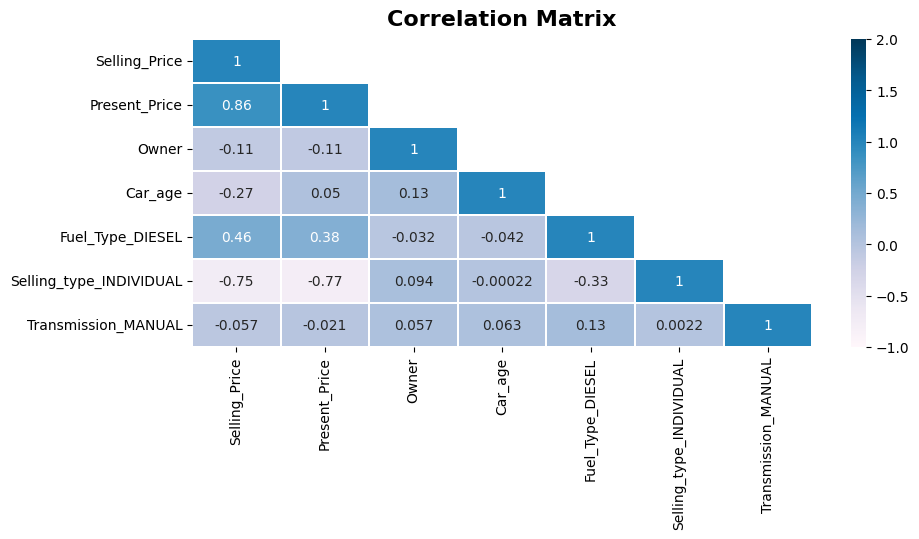

In [44]:
corr_matrix =df_no_mc.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='PuBu')
plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=10)
plt.show()

In [45]:
X = df_no_mc.drop('Selling_Price',axis=1)
y = df_no_mc['Selling_Price']

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


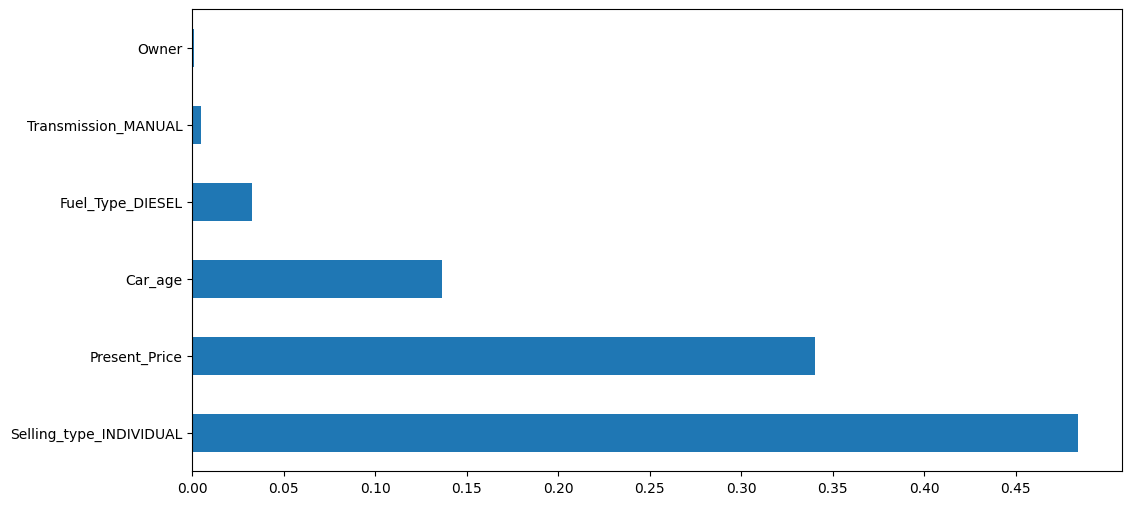

In [47]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
g=feat_importances.nlargest(6).plot(kind='barh')
plt.xticks(np.arange(0, 0.5, step=0.05)) 
plt.show()

In [48]:
print(feat_importances.sort_values(ascending=False))

Selling_type_INDIVIDUAL    0.484035
Present_Price              0.340509
Car_age                    0.136637
Fuel_Type_DIESEL           0.032794
Transmission_MANUAL        0.004912
Owner                      0.001112
dtype: float64


In [49]:
df_new = df_no_mc[['Selling_Price', 'Present_Price', 'Car_age','Selling_type_INDIVIDUAL','Fuel_Type_DIESEL', 'Transmission_MANUAL']]
df_new.head()

,Selling_Price,Present_Price,Car_age,Selling_type_INDIVIDUAL,Fuel_Type_DIESEL,Transmission_MANUAL
0,3.35,5.59,11,0,0,1
1,4.75,9.54,12,0,1,1
2,7.25,9.85,8,0,0,1
3,2.85,4.15,14,0,0,1
4,4.60,6.87,11,0,1,1


In [50]:
df_new.isnull()
df_new.isnull().sum().sum()
df_new.dropna(inplace=True)
df_new = df_new.reset_index(drop=True)

X = df_new.drop('Selling_Price', axis=1)
y = df_new['Selling_Price']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [52]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((220, 5), (220,), (55, 5), (55,))


Model is: LinearRegression()

Training score : 0.861485986412714

Predictions are : [ 2.50545068 -0.58831606  4.40954782 -0.31316111  4.79833925  4.41249854
  7.61777607  5.78018643  7.28858555  1.21251875  1.99926857  6.76775798
  6.65645284  4.15103608  7.94696659  0.01777249  4.17518707  9.14260654
  1.62650098  4.74168906  0.53702772  8.81341602  4.50437759  3.95094872
  5.87941793  6.44591992 -1.33385125  1.87594552  6.55858802  1.05763654
  2.86987005  1.71601758  2.54902775  1.33889228  1.21251875  9.93707229
  7.94696659  7.61777607  5.22975231  3.6693258   5.0510863   1.38246935
  8.53698727  3.59088706  0.32822487  1.52863615  3.74177876  6.14228738
  5.12915784  1.68115592  1.74851679  9.11656238  0.19008554  7.70266986
  0.23802032]

Plotting the actual and predicted values:


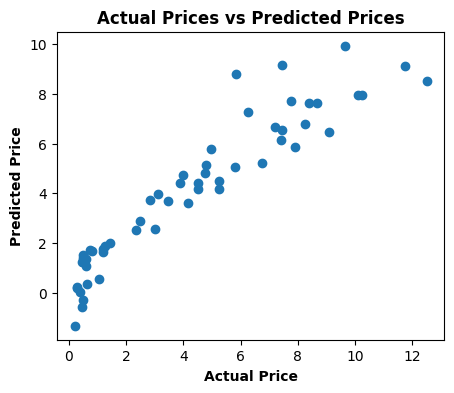


Performance metrices:

R2 score: 0.872994894404362
MAE : 0.9377848963650726
MSE : 1.506962416535487
RMSE : 1.2275839753497464
---------------------------------------------------------------------------------------------------------------------------------------

Model is: DecisionTreeRegressor()

Training score : 0.9962044272401603

Predictions are : [ 2.825       0.52        4.38333333  0.45        4.65        3.65
  8.86666667  5.275       8.86666667  0.4         1.275       5.95
  5.125       4.75       10.2         0.6         4.95        7.
  1.15        3.95        1.95        7.          5.3         3.025
  5.65        9.25        0.25        1.15        5.95        0.54333333
  1.35        0.9         2.825       0.6         0.4         9.25
 10.2         8.86666667  4.75        3.5         6.1         0.72
 11.25        3.5         0.38        0.48        3.          6.2
  5.11        0.75        1.65       11.25        0.25        7.25
  0.25      ]

Plotting the actual and 

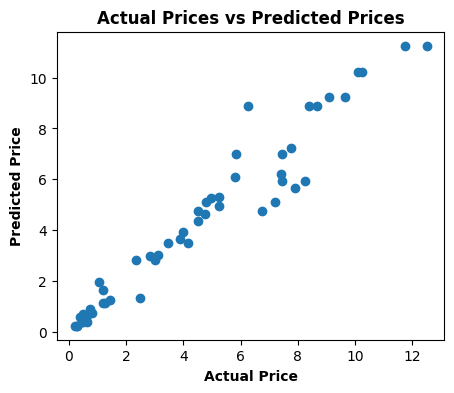


Performance metrices:

R2 score: 0.9431903052036966
MAE : 0.4898787878787879
MSE : 0.6740679797979798
RMSE : 0.8210164308940351
---------------------------------------------------------------------------------------------------------------------------------------

Model is: RandomForestRegressor()

Training score : 0.9877034308321664

Predictions are : [ 2.81775     0.47768333  3.89928452  0.46793333  4.6945      4.06175556
  8.89774762  5.21750714  8.39673095  0.4287      1.28366071  6.48816667
  5.88641667  4.80293452 10.37005     0.51978333  4.782975    6.95187619
  1.16510833  4.3445      2.4305      6.4380381   5.10966667  2.98135417
  6.0707      8.4534      0.2345      1.56675     6.278       0.61641643
  2.09625     0.8401      2.82470833  0.64389333  0.4287      7.32403333
 10.37005     8.89774762  5.53466667  3.73425     5.6695      0.73465
 10.63458333  3.67675     0.4378      0.45429881  2.90525     6.33443333
  5.38604881  0.7314      1.41758333 10.787       0.2621      8

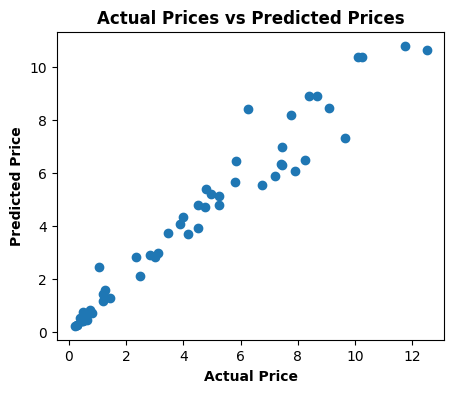


Performance metrices:

R2 score: 0.950378096961558
MAE : 0.4931379516594517
MSE : 0.5887821797808765
RMSE : 0.7673214318529599
---------------------------------------------------------------------------------------------------------------------------------------

Model is: GradientBoostingRegressor()

Training score : 0.9884952733222887

Predictions are : [ 2.69947507  0.38448333  4.18977318  0.50315377  4.7163638   4.36189844
  9.05196279  5.0437668   8.3563896   0.46277983  1.29212634  7.00649787
  6.12510132  4.36867219 10.2213609   0.50726615  4.64196891  6.95708586
  1.26099666  4.7163638   2.00215508  6.39222835  5.10566702  3.07876886
  6.3895697   8.3336032   0.21463591  1.71826634  6.25960663  0.59853819
  1.73639659  0.75639782  2.69947507  0.72526813  0.46277983  9.18499917
 10.2213609   9.05196279  5.98898028  3.78850076  5.46126088  0.72526813
 10.85013911  3.7106208   0.36704054  0.47693155  2.91906649  6.99768815
  5.08834091  0.75639782  1.54606532 11.30503637  0.18100

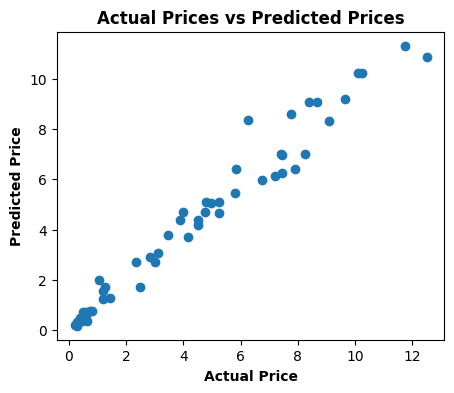


Performance metrices:

R2 score: 0.9675778015694241
MAE : 0.42016613889138904
MSE : 0.3847013414712029
RMSE : 0.620242969707197
---------------------------------------------------------------------------------------------------------------------------------------

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num

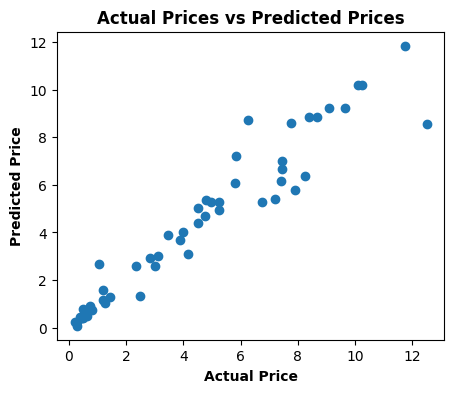


Performance metrices:

R2 score: 0.9276644374415812
MAE : 0.535206677377224
MSE : 0.8582881266328589
RMSE : 0.9264384095194126
---------------------------------------------------------------------------------------------------------------------------------------


In [54]:
r_2 = [] 
MSE = [] 
MAE = [] 
RMSE = [] 

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('\nModel is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('\nTraining score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('\nPredictions are : {}'.format(prediction))
    
    print('\nPlotting the actual and predicted values:')
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, prediction)
    plt.xlabel("Actual Price", fontweight='bold')
    plt.ylabel("Predicted Price", fontweight='bold')
    plt.title("Actual Prices vs Predicted Prices", fontweight='bold')
    plt.show()

    print('\nPerformance metrices:')
    
    r2score = r2_score(y_test,prediction)
    print('\nR2 score: {}'.format(r2score))
    mae = mean_absolute_error(y_test,prediction)
    print('MAE : {}'.format(mae))
    mse = mean_squared_error(y_test,prediction)
    print('MSE : {}'.format(mse))
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('RMSE : {}'.format(rmse))

    r_2.append(r2score)
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)  
    
    print("-"*135)

In [55]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']
result=pd.DataFrame({'Models': models,'R2 score': r_2,'Mean Absolute Error (MAE)':MAE,'Mean Squared Error (MSE)': MSE,'Root Mean Square Error (RMSE)':RMSE})
result = result.sort_values(by='R2 score',ascending=False).reset_index(drop=True)
result.index = result.index + 1
result

,Models,R2 score,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Square Error (RMSE)
1,GradientBoostingRegressor,0.967578,0.420166,0.384701,0.620243
2,RandomForestRegressor,0.950378,0.493138,0.588782,0.767321
3,DecisionTreeRegressor,0.943190,0.489879,0.674068,0.821016
4,XGBRegressor,0.927664,0.535207,0.858288,0.926438
5,LinearRegression,0.872995,0.937785,1.506962,1.227584


In [56]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Actual_Selling_Price':y_test,'Predicted_Selling_Price':y_pred})
df_copy = df.copy()
df_copy.drop("Selling_Price",axis=1,inplace=True)
dataset_final = df_copy.merge(out,left_index=True,right_index=True)
dataset_final.reset_index(drop=True).head(10)

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age,Actual_Selling_Price,Predicted_Selling_Price
0,8.12,18796,PETROL,DEALER,MANUAL,0,10,6.75,5.988980
1,8.92,42367,DIESEL,DEALER,MANUAL,0,10,7.45,6.259607
2,10.79,43000,DIESEL,DEALER,MANUAL,0,9,7.75,8.604070
3,7.98,41442,PETROL,DEALER,MANUAL,0,15,2.85,2.919066
4,8.01,50000,PETROL,DEALER,AUTOMATIC,0,14,2.50,1.894222
5,4.41,56879,PETROL,DEALER,MANUAL,0,12,3.00,2.699475
6,4.99,20000,PETROL,DEALER,MANUAL,0,14,4.15,3.710621
7,5.98,51439,DIESEL,DEALER,MANUAL,0,13,2.35,2.699475
8,7.15,58000,PETROL,DEALER,MANUAL,0,17,1.25,1.876091
9,12.04,15000,PETROL,DEALER,AUTOMATIC,0,11,1.05,2.004616


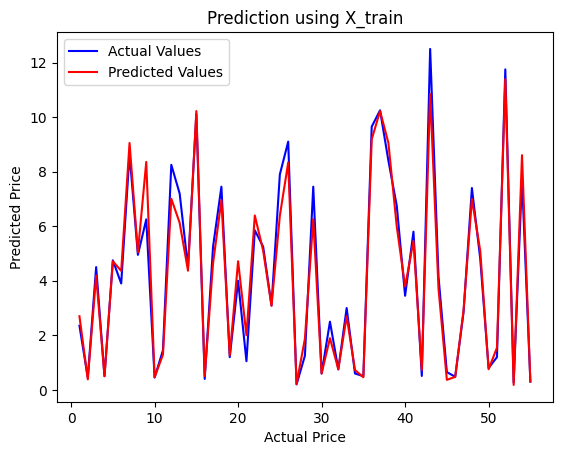

In [58]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='b',linestyle='-',label="Actual Values")
plt.plot(c,y_pred,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction using X_train')
plt.legend()
plt.show()